In [83]:
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import pandas_datareader as PP
    import datetime as dt
    import pandas_datareader as PP
    import datetime as dt
    import matplotlib.pyplot as plt
    import seaborn as sb
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.svm import SVR
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import r2_score
    from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

In [84]:
    print("what currency you are intersted in ")
print("example: BTC,XRP,ETH")
Crypto_Currency = ""
#this is the var that we use to detect what is your crypto
Crypto_Currency=input(Crypto_Currency.upper())
print(Crypto_Currency)
print("what currency do you wanna convert to :")
print("ex:- EGP,USD")
aginst_currensy=""
#this is the var that we use to detect what is your phsical currency
aginst_currensy=input(aginst_currensy.upper())
print(aginst_currensy)
#we spsfay the tme that we need to collect 
Start=dt.datetime(2019, 1, 1)
#end tme is now to make module prediecting the next (ISA tab3n)
End=dt.datetime.now()


what currency you are intersted in 
example: BTC,XRP,ETH
BTC
BTC
what currency do you wanna convert to :
ex:- EGP,USD
EGP
EGP


In [85]:
Data = pd.read_csv("BTC-USD.csv")


In [86]:
Data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [87]:
Data.isna().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [88]:
Data.dropna(inplace=True)


In [89]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 171.7+ KB


In [90]:
df= Data


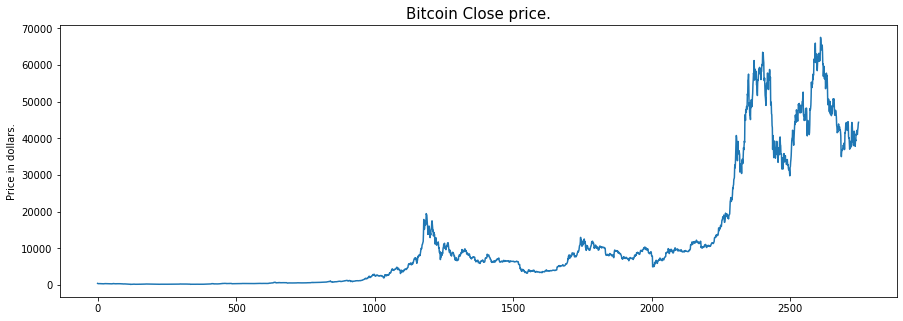

In [91]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [92]:
df2=df

In [93]:
 df.drop(['Adj Close'] , 1 , inplace=True)

In [94]:
Data

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,31042992291


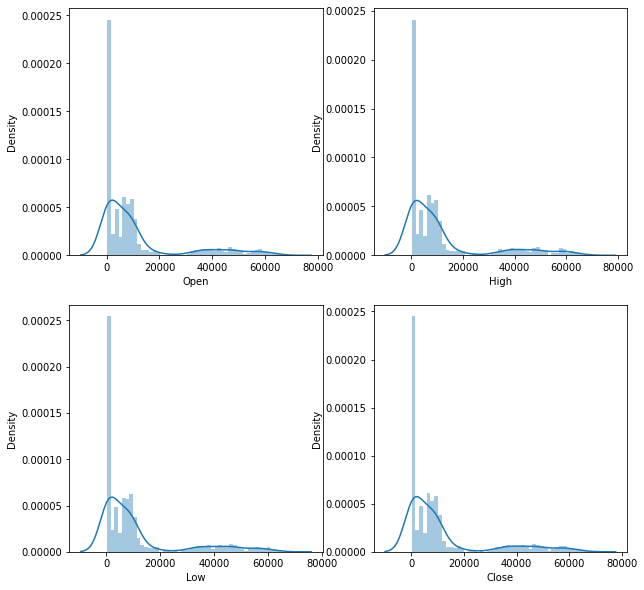

In [95]:
features = ['Open', 'High', 'Low', 'Close']
 
plt.subplots(figsize=(10,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(Data[col])
plt.show()

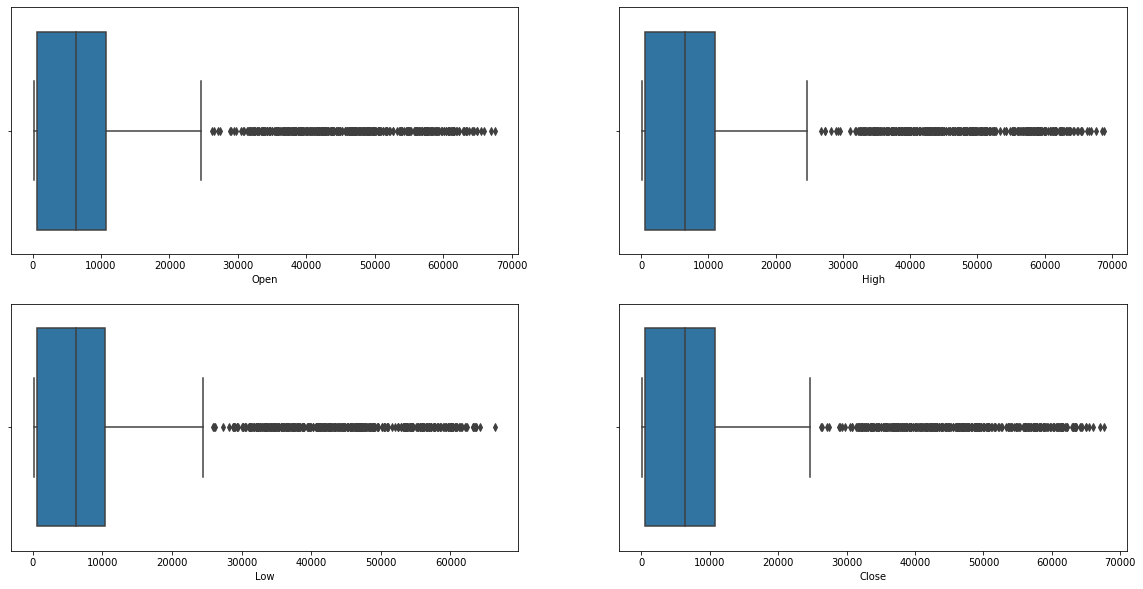

In [96]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(Data[col])
plt.show()

In [97]:
 df.drop(['Date'] , 1 , inplace=True)

In [98]:
df

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2742,41246.132813,41454.410156,40668.042969,41077.996094,24615543271
2743,41074.105469,43124.707031,40948.281250,42358.808594,32004652376
2744,42364.378906,42893.507813,41877.507813,42892.957031,25242943069
2745,42886.652344,44131.855469,42726.164063,43960.933594,31042992291


In [99]:
df2.drop(['Low','Open','Volume'],1,inplace=True)

In [100]:
df

,High,Close
0,468.174011,457.334015
1,456.859985,424.440002
2,427.834991,394.795990
3,423.295990,408.903992
4,412.425995,398.821014
...,...,...
2742,41454.410156,41077.996094
2743,43124.707031,42358.808594
2744,42893.507813,42892.957031
2745,44131.855469,43960.933594


In [101]:
df.corr()


,High,Close
High,1.000000,0.999493
Close,0.999493,1.000000


In [102]:
 print("Enter number of predicted days")
 Prediction_Days = int(input())

Enter number of predicted days
40


In [103]:
df['Prediction_Close'] = df['Close'].shift(-Prediction_Days)


In [104]:
df

,High,Close,Prediction_Close
0,468.174011,457.334015,352.989014
1,456.859985,424.440002,357.618011
2,427.834991,394.795990,335.591003
3,423.295990,408.903992,345.304993
4,412.425995,398.821014,338.321014
...,...,...,...
2742,41454.410156,41077.996094,NaN
2743,43124.707031,42358.808594,NaN
2744,42893.507813,42892.957031,NaN
2745,44131.855469,43960.933594,NaN


In [105]:
    #crate indebendetn data set
    #covert df to np array and drop predection column 
    X = np.array(df.drop(['Prediction_Close'],1))
    #remove the last 'n' rows where 'n' is the Prediction days
    X= X[:len(df)-Prediction_Days]

    print(X)

[[  468.174011   457.334015]
 [  456.859985   424.440002]
 [  427.834991   394.79599 ]
 ...
 [43810.832031 42407.9375  ]
 [42992.550781 42244.46875 ]
 [42693.054688 42197.515625]]


In [106]:
 #create the debndant data set 

    #convert the df to np array 
Y = np.array(df['Prediction_Close'])
    #get all of the val exept the last 'n' rpws
Y=Y[:-Prediction_Days]


In [107]:
Y

array([  352.989014,   357.618011,   335.591003, ..., 42892.957031,
       43960.933594, 44395.964844])

In [108]:
 #split the data into 80% traning andd 20% testing
x_train, x_test, y_train, y_test =train_test_split(X,Y, test_size=0.2)

In [109]:
x_train

array([[50341.101563, 49199.871094],
       [ 6255.709961,  6153.850098],
       [ 1053.170044,  1046.209961],
       ...,
       [  468.174011,   457.334015],
       [ 6741.75    ,  6741.75    ],
       [  285.501007,   281.881989]])

In [110]:
Prediction_Days_Array = np.array(df.drop(['Prediction_Close'],1))[-Prediction_Days:]
print(Prediction_Days_Array)

[[42775.777344 42586.917969]
 [44667.21875  44575.203125]
 [44578.277344 43961.859375]
 [44132.972656 40538.011719]
 [40929.152344 40030.976563]
 [40418.878906 40122.15625 ]
 [40119.890625 38431.378906]
 [39394.4375   37075.28125 ]
 [38359.855469 38286.027344]
 [39122.394531 37296.570313]
 [38968.839844 38332.609375]
 [39630.324219 39214.21875 ]
 [40005.347656 39105.148438]
 [39778.941406 37709.785156]
 [43760.457031 43193.234375]
 [44793.601563 44354.636719]
 [45077.578125 43924.117188]
 [44021.578125 42451.789063]
 [42479.613281 39137.605469]
 [39566.335938 39400.585938]
 [39640.175781 38419.984375]
 [39430.226563 38062.039063]
 [39304.441406 38737.269531]
 [42465.671875 41982.925781]
 [42004.726563 39437.460938]
 [40081.679688 38794.972656]
 [39308.597656 38904.011719]
 [39209.351563 37849.664063]
 [39742.5      39666.753906]
 [39794.628906 39338.785156]
 [41465.453125 41143.929688]
 [41287.535156 40951.378906]
 [42195.746094 41801.15625 ]
 [42316.554688 42190.652344]
 [42241.164063

In [111]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(x_train,y_train)
accuracy=reg.score(x_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data

Accuracy is: 90.0578 %


In [112]:
reg_prediction = reg.predict(x_test)
print(reg_prediction)

print()

#print actual values
print(y_test)

[44876.46152356   233.49719671 10396.0185106    246.84189311
   813.99741687 56834.66681632 11319.99628416   701.88119014
   264.67290805  4160.60862077 14413.84052749   244.29644347
  1021.46052905   236.41746564   302.22375537  7900.20697032
   578.79459976  8569.35056637  5761.78074227  9938.16816639
  8629.97340572 16632.95867218 47553.76316412   263.52922918
  4145.91836648  6423.36744499  9512.79114984   374.34747906
  9997.04280543  4932.37882817 11383.25125982  7773.63794188
 55242.63949233 41221.01294904   243.36228938 51670.48214862
 21312.6089748    284.68320362  9290.38144769 45406.18761733
  6287.10762947  1112.54421326  8125.97427465   823.93432849
 42565.2298635  48537.68996128   291.50777638 33747.28295919
  6183.01891094 12994.73807854  8501.16058115 11005.21624009
  8157.60177988 55934.47339861  3019.79456442   263.23453295
   285.24336542  8091.5106593   3991.48528193  2566.14771228
 54564.44156252  8875.00338144 38859.53533202   452.58963007
   272.84814635  1221.18

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [114]:
Reg = LinearRegression(n_jobs=-1)

In [115]:
Reg.fit(x_train , y_train)

LinearRegression(n_jobs=-1)

In [116]:
y_train_pred_Reg = Reg.predict(x_train)
y_test_pred_Reg = Reg.predict(x_test)

In [117]:
print("Train R squared in LR is " , r2_score(y_train , y_train_pred_Reg))
print("Test R squared in LR is " , r2_score(y_test , y_test_pred_Reg))

Train R squared in LR is  0.9001539126753688
Test R squared in LR is  0.8747817315942573


In [118]:
Reg_prediction = Reg.predict(x_test)
print(Reg_prediction)

print()

#print actual values
print(y_test)

[47809.19979475  1204.5604171   8551.85323064  1165.72024153
  1634.07653512 42509.13864105 11243.99166702  1535.36593062
  1183.43389674  5025.89269727 11176.63359829  1195.78023353
  1943.97546667  1204.19751906  1172.76949098  9350.33773434
  1580.89908332 10005.50601729  7287.02280352 10122.51015066
  9309.06429889 14186.52406584 31763.80628698  1181.84668455
  4689.31797603  7185.50873383  7799.78188773  1371.02520867
 10978.47770326  7063.18901281  9661.39745629 10870.83382262
 47402.54156532 61573.78229122  1179.159126   45629.88869088
 15798.61722335  1179.75614138 10656.73888045 48436.21577089
  7174.70158655  1958.91273566  7402.87580798  1693.54795987
 33133.75343687 30074.40735983  1256.58395573 18242.34897432
  5720.33542466 11758.10527095  6412.77938942 16531.04263124
  6110.84656269 55058.40198535  3616.04102552  1181.15141003
  1253.27649882  7495.44294043  4451.46559366  3529.35671814
 53712.18747384 10359.34707272 38259.67275413  1350.17663297
  1169.13101259  2001.90

In [119]:
Reg2 = linear_model.Lasso(alpha=0.1)

In [120]:
Reg2.fit(x_train , y_train)


Lasso(alpha=0.1)

In [121]:
y_train_pred_Reg2 = Reg2.predict(x_train)
y_test_pred_Reg2 = Reg2.predict(x_test)

In [122]:
print("Train R squared in LL is " , r2_score(y_train , y_train_pred_Reg2))
print("Test R squared in LL is " , r2_score(y_test , y_test_pred_Reg2))

Train R squared in LL is  0.9001486414297859
Test R squared in LL is  0.8743738630898747


In [123]:
Reg2_prediction = Reg2.predict(x_test)
print(Reg2_prediction)

print()

#print actual values
print(y_test)

[47980.29333962  1204.23042421  8539.01734031  1165.52650099
  1632.79729713 42456.89905492 11247.35543082  1534.19924324
  1183.18590056  5034.01952548 11158.33371086  1195.3503413
  1942.16047877  1204.13184745  1172.61779028  9337.44634293
  1585.88434373 10056.04648396  7283.32470409 10114.30022158
  9299.03284076 14178.89574046 31736.6411048   1181.62408071
  4683.63479175  7173.13428757  7794.35595993  1370.73111516
 10962.17001651  7055.61308915  9650.20114884 10861.7024055
 47444.07193626 61530.20318648  1178.76114772 45550.14858106
 15778.5538579   1179.32505159 10671.81066019 48579.90478237
  7169.06614714  1958.17512875  7393.93774728  1692.25985056
 33088.04208219 30107.69950553  1256.38573924 18215.84415028
  5721.46378331 11747.58860366  6405.67304773 16622.39526947
  6100.47661066 55087.35661222  3611.31115803  1181.88584719
  1252.67414561  7482.55536193  4444.78146181  3525.54457062
 53701.88770047 10341.47231877 38185.06578912  1349.44427119
  1168.72924623  2000.1598

In [124]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.0000009)
svr_rbf.fit(x_train,y_train)


SVR(C=1000.0, gamma=9e-07)

In [125]:
svr_rbf_testing = svr_rbf.score(x_test,y_test)
print("svr_rbf accuracy: ", svr_rbf_testing)
     

svr_rbf accuracy:  0.8546967928161293


In [126]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

print()

#print actual values
print(y_test)

[33123.42700724   252.0351592   9510.45706868   317.94738022
   843.36707486 37761.90302841 10538.05303107   717.6810555
   280.86369376  5354.59805938 12256.53501168   262.18550875
  1319.40875898   252.13076999   301.9125993   9115.44846535
   769.35108049 11132.34774859  6559.07408716  9209.07531111
  8890.66430929 18649.88089518 38142.34130214   283.72382187
  4990.85477192  6426.12407646  9046.21850509   395.56213634
 10968.0236476   6303.49857118  9524.53624923  9643.03579625
 39659.92351611 33798.42005461   288.4114574  36729.7602194
 23373.69811892   287.25707162  8204.33068422 33171.98322199
  6272.08208701  1338.24673243  7273.21245193   901.09511185
 38236.1545226  29884.57422345   238.82194426 28850.51652971
  7119.99383708 11266.34612731  9328.54662881 24846.48187015
  8971.05454393 35423.14079387  4224.52090651   289.13570852
   240.46481752  8003.86110784  4294.5085762   4162.21573751
 34981.81357907  9247.19502346 33053.19999712   362.25209569
   309.2001569   1501.6157

In [127]:

model2 = KNeighborsRegressor(n_neighbors=5)

In [128]:

model2.fit(x_train , y_train)

KNeighborsRegressor()

In [129]:
y_train_pred_KNN = model2.predict(x_train)
y_test_pred_KNN = model2.predict(x_test)

In [130]:
print("Train R squared in KNN is" , r2_score(y_train , y_train_pred_KNN))
print("Test R squared in KNN is " , r2_score(y_test , y_test_pred_KNN))

Train R squared in KNN is 0.9595305097130454
Test R squared in KNN is  0.9092277106095262


In [131]:
model2_testing = model2.score(x_test,y_test)
print("KNN accuracy: ", model2_testing)
     

KNN accuracy:  0.9092277106095262


In [132]:
KNN_prediction = model2.predict(x_test)
print(KNN_prediction)

print()

#print actual values
print(y_test)

[43706.7929688   238.4460022  9907.0381836   243.2997986   808.6611938
 49616.1195312 11103.0442384   683.8880004   262.9678042  5094.6670412
 15012.8621094   257.8465974  1107.5157958   233.7508026   266.0787964
  8360.856836    638.0108032  8468.942871   7387.657959   9122.6198242
  9457.3397462 15171.7417972 48453.          283.1104064  4577.5164548
  6620.6532226  8480.785156    400.8937988 11185.2203126  5722.4937502
 11574.6220702  7810.5631836 52569.6       41456.3265624   243.620999
 40895.8156252 20467.2671876   280.9646026  8322.0646484 45444.8234376
  5930.3840334  1181.497998   7279.20166     888.8608032 44334.4683596
 48244.8726566   272.4973996 31087.7906252  7112.8933592 15303.9058594
  8524.7112306 15574.5894532  8031.6893554 52548.9046878  4144.3599612
   246.0065978   264.8845976  8021.3271484  3959.7928222  2873.4479736
 51528.5789064  8627.416211  42883.7171876   448.7635928   283.8211974
  1436.1740236  9981.5078126  8195.2961916  5629.6053222 10433.488086
 51135.8